Importing packages

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from tensorflow import keras

Importing datasets

11490434/11490434 [==============================] - 210s 18us/step
X_train shape =  (60000, 28, 28)  X_test shape =  (10000, 28, 28)


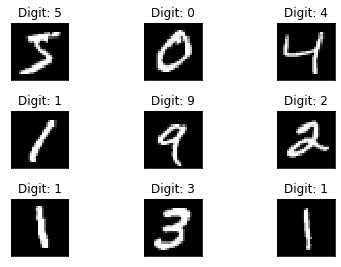

In [4]:
# Using Keras to load the dataset
# Every image is represented as a 28 × 28 array 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train shape = ",X_train.shape," X_test shape = ",X_test.shape)

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation="none")
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0 
# (this also converts them to floats).
X_train = X_train / 255.0
X_test  = X_test / 255.0

Building NN model

In [5]:
# Creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# The model’s summary() method displays all the model’s layers
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________
None
